In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms as T

import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
sys.path

['/home/shyam/myProjects/unet/notebooks',
 '/home/shyam/miniconda3/envs/pytorch1.1/lib/python37.zip',
 '/home/shyam/miniconda3/envs/pytorch1.1/lib/python3.7',
 '/home/shyam/miniconda3/envs/pytorch1.1/lib/python3.7/lib-dynload',
 '',
 '/home/shyam/miniconda3/envs/pytorch1.1/lib/python3.7/site-packages',
 '/home/shyam/miniconda3/envs/pytorch1.1/lib/python3.7/site-packages/IPython/extensions',
 '/home/shyam/.ipython',
 '/home/shyam/myProjects/unet']

In [3]:
from models import UNet
from datasets import kidney
from config import (config as cfg,
                    architecture as arch,
                    data_loaders as dl)

In [4]:
train_loader = dl.train_loader

In [5]:
tl = iter(train_loader)

In [10]:
sample = next(tl)
sample['image'].to(cfg.device)
sample['label'].to(cfg.device)

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

In [11]:
import matplotlib.pyplot as plt

In [16]:
sample['label'].squeeze().size()

torch.Size([4, 400, 400])

In [17]:
sample['image'].squeeze().size()

torch.Size([4, 3, 400, 400])

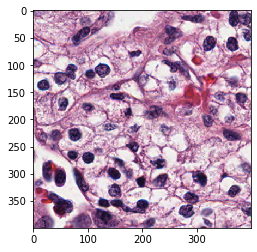

In [19]:
plt.imshow(sample['image'][3, :, :, :].permute(1, 2, 0).numpy())

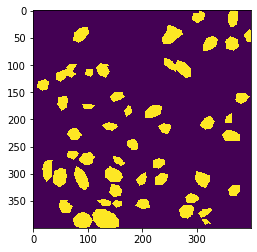

In [21]:
plt.imshow(sample['label'][3, :, :].numpy())

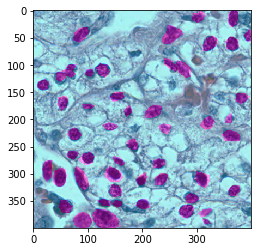

In [34]:
plt.imshow(sample['image'][3, :, :, :].permute(1, 2, 0).numpy())
plt.imshow(sample['label'][3, :, :].numpy(), cmap='cool', alpha=0.3)

In [35]:
model = arch.model.to(cfg.device)
optimizer = arch.optimizer
criterion = arch.criterion
resume_from_epoch = cfg.resume_from_epoch
min_val_loss = cfg.min_val_loss
device = cfg.device

if True:
    # Load values from checkpoint file
    checkpoint = torch.load('../checkpoints/model_final.pth')
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    resume_from_epoch = checkpoint['epoch']

In [18]:
min_val_loss

0.16977690805385753

In [17]:
resume_from_epoch

10

In [36]:
model.eval()

UNet(
  (input): _EncoderBlock(
    (encode): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace)
    )
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (enc1): _EncoderBlock(
    (encode): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
      (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace)
    )
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_m

In [37]:
model.eval()
prediction = model(sample['image'].to(cfg.device))

In [38]:
prediction.size()

torch.Size([4, 2, 400, 400])

In [39]:
y = prediction.squeeze()

In [40]:
y.size()

torch.Size([4, 2, 400, 400])

In [41]:
ynp = y[3].permute(1, 2, 0).detach().cpu().numpy()

In [42]:
ynp.shape

(400, 400, 2)

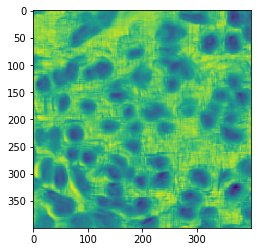

In [43]:
plt.imshow(ynp[:, :, 0])

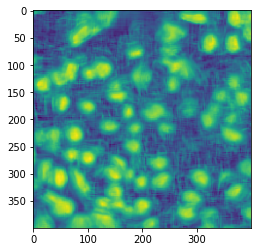

In [44]:
plt.imshow(ynp[:, :, 1])

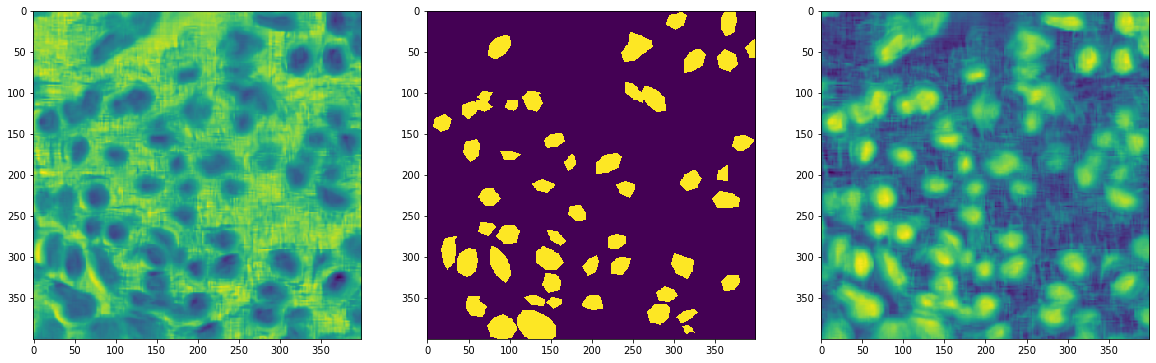

In [46]:
fig, ax = plt.subplots(1, 3,figsize=(20, 20))
ax[0].imshow(ynp[:, :, 0])
ax[1].imshow(sample['label'][3].squeeze().detach().cpu().numpy())
ax[2].imshow(ynp[:, :, 1])

In [51]:
import numpy as np
np.unique(ynp)

array([-6.087055 , -6.035924 , -5.953773 , ...,  4.485623 ,  4.558816 ,
        4.6149025], dtype=float32)

In [50]:
ynp.shape

(400, 400, 2)

In [61]:
ynpn= np.abs(ynp)/np.max(np.abs(ynp))

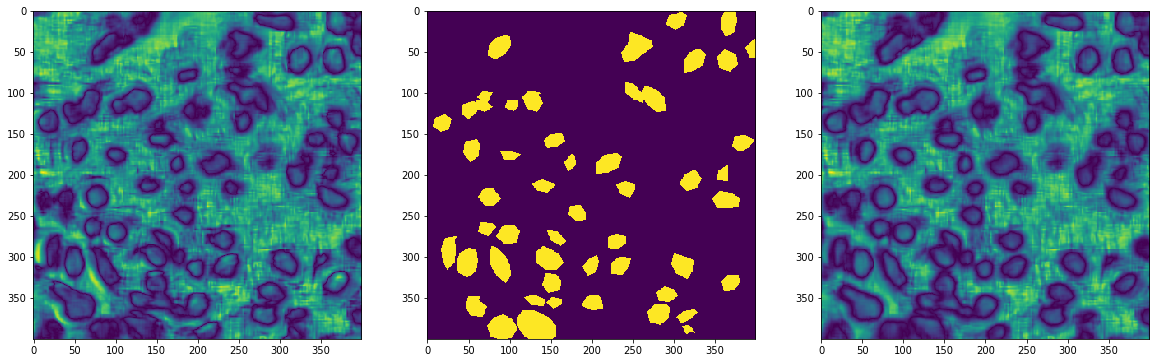

In [62]:
fig, ax = plt.subplots(1, 3,figsize=(20, 20))
ax[0].imshow(ynpn[:, :, 0])
ax[1].imshow(sample['label'][3].squeeze().detach().cpu().numpy())
ax[2].imshow(ynpn[:, :, 1])